In [1]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid
import torch.nn as nn
import torchvision.models as models

import matplotlib.pyplot as plt
import numpy as np
import utils

In [2]:
# Define the mini-batch size
batch_size = 10

# Download the dataset and create the dataloaders
mnist_data = datasets.MNIST("./", train=True, download=True, transform=transforms.ToTensor())

train_size = int(0.8 * len(mnist_data))
val_size = len(mnist_data) - train_size

mnist_train, mnist_val = torch.utils.data.random_split(mnist_data, [train_size, val_size])

train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(mnist_val, batch_size=batch_size, shuffle=False)

mnist_test = datasets.MNIST("./", train=False, download=True, transform=transforms.ToTensor())
test_loader = DataLoader(mnist_test, batch_size=batch_size, shuffle=False)

torch.Size([1, 28, 28])


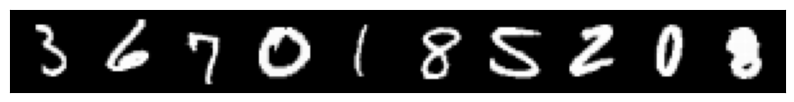

In [3]:
# plot the first 10 images
for images,lables in train_loader: 
    print(images[0].shape)
    fig, ax = plt.subplots(figsize = (10,10))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(make_grid(images[:10],10).permute(1,2,0))
    break

In [4]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Grayscale(),
    transforms.Resize((28,28))
])

svhn_test = datasets.SVHN("./", split="test", download=True, transform=transform)
test_loader_svhn = DataLoader(svhn_test, batch_size=batch_size, shuffle=False)

Using downloaded and verified file: ./test_32x32.mat


torch.Size([1, 28, 28])


c:\Users\britta\anaconda3\envs\nnlm\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


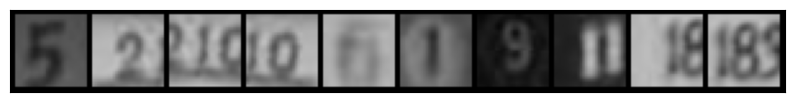

In [5]:
# plot the first 10 images
for images,lables in test_loader_svhn: 
    print(images[0].shape)
    fig, ax = plt.subplots(figsize = (10,10))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(make_grid(images[:10],10).permute(1,2,0))
    break

In [6]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 3, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(3, 6, 3)
        self.fc1 = nn.Linear(726, 120)
        self.fc2 = nn.Linear(120, 10)
        self.af = nn.ReLU()

    def forward(self, x):
        # Implement the forward function in the network
        x = self.conv1(x)
        x = self.af(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.af(x)
        x = x.flatten(1)
        x = self.fc1(x)
        x = self.af(x)
        x = self.fc2(x)
        return x

Epoch 0, training loss: 0.023702809598319316, validation loss: 0.012738079317658654
Train accuracy = 0.9276875
Validation accuracy = 0.96025
Epoch 5, training loss: 0.0022757093233672534, validation loss: 0.007483361355432199
Train accuracy = 0.9924583333333333
Validation accuracy = 0.9806666666666667
Epoch 10, training loss: 0.0010605404461204845, validation loss: 0.008862148240850484
Train accuracy = 0.9963125
Validation accuracy = 0.9830833333333333
Epoch 15, training loss: 0.0008682391262464554, validation loss: 0.010705753599090428
Train accuracy = 0.997125
Validation accuracy = 0.983


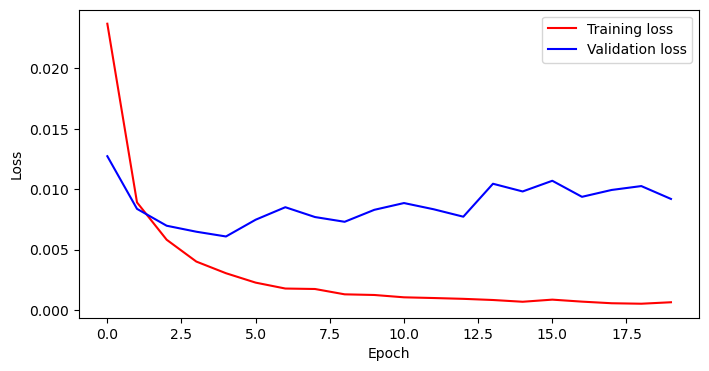

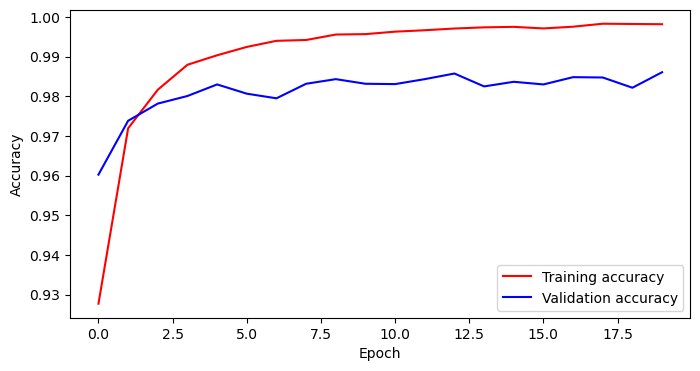

lowest loss for validation set: 0.006095490026222336, with an accuracy of 0.983


In [7]:
# Hyperparams
LEARNING_RATE = 0.001
epochs = 20

# Load our network
model = Net()

# Define our loss function
criterion = nn.CrossEntropyLoss()

# Define our optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

# Train the model
utils.train_model(model, criterion, optimizer, train_loader, val_loader, "best_model_Mnist.pt", epochs)

Test accuracy is 98.0%.


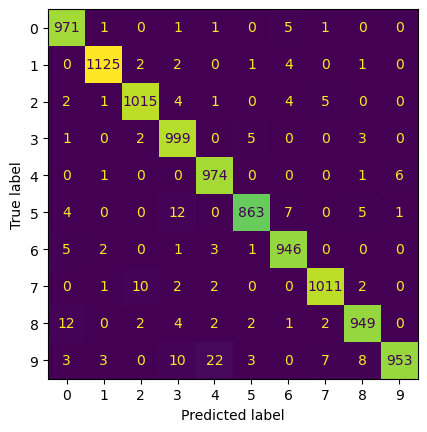

In [8]:
# Test the model
best_model = Net()
best_model = torch.load('best_model_Mnist.pt')

utils.test_model(best_model, test_loader)

c:\Users\britta\anaconda3\envs\nnlm\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Test accuracy is 24.0%.


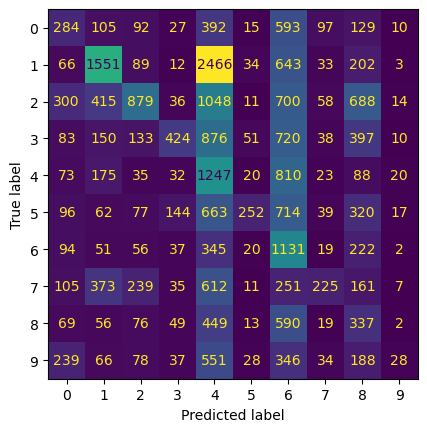

In [9]:
utils.test_model(best_model, test_loader_svhn)